In [1]:
# get methods from py-file in other directory
import sys
sys.path.append('..')
#from data_exploration.data_ex import import_data
from data_ex import import_data

In [2]:
import data_ex
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import pandas as pd
import numpy as np

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import CategoricalNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
from sklearn.metrics import roc_auc_score, roc_curve,scorer, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import plot_confusion_matrix

from sklearn.tree import plot_tree


/home/jedi/anaconda3/envs/christian-tf/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
df = import_data('../../data/churn.csv')
display(df)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11,50,408,2000,0,1,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,49,152,415,394,0,0,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,7,61,415,313,0,0,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,7,109,510,3471,0,0,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0


In [6]:
display(df.info()) # just for first insights into columnnames etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   int64  
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   int64  
 4   international_plan             5000 non-null   int64  
 5   voice_mail_plan                5000 non-null   int64  
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

None

In [7]:
display(df.describe()) # just for first insights 

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
count,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.99840,100.25860,436.911400,2499.500000,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,...,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,0.141400
std,14.80348,39.69456,42.209182,1443.520003,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,...,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,0.348469
min,0.00000,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.00000,73.00000,408.000000,1249.750000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.00000,100.00000,415.000000,2499.500000,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,...,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.00000,127.00000,415.000000,3749.250000,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,...,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,50.00000,243.00000,510.000000,4999.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,...,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [8]:
#plt.style.use('dark_background')

In [9]:
#sns.pairplot(df)

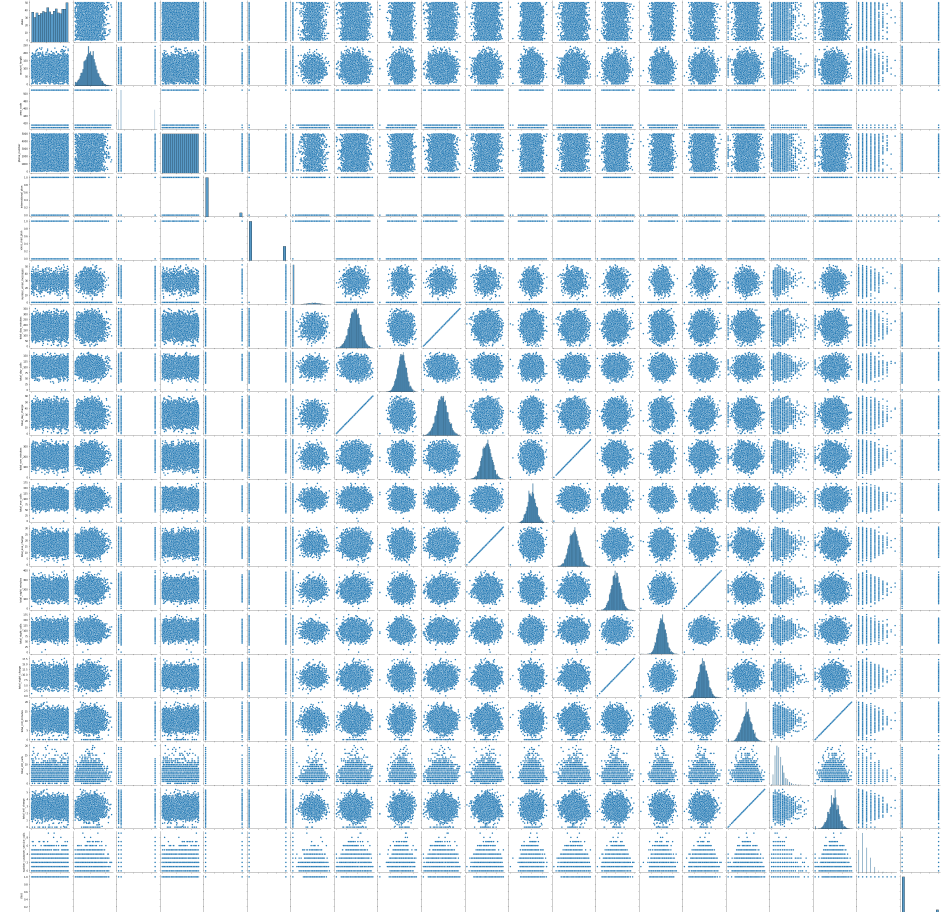


 # TARIFFs
 
 high correlations in data: charge per minute => drop charge as correlated feature
 
 international call tariff statistics:
 
 * different international plans exist over different states  
 * interesting to see many users having international calls without having international plans, BUT being cheaper then having an international plan! ?
 * marginal differences in tariffs, charge and #calls according to churn/no-churn

In [10]:
df["total_day_tariff"]   = df["total_day_charge"] / df["total_day_minutes"] 
df["total_eve_tariff"]   = df["total_eve_charge"] / df["total_eve_minutes"]
df["total_night_tariff"] = df["total_night_charge"] / df["total_night_minutes"]
df["international_tariff"] = df["total_intl_charge"] / df["total_intl_minutes"]

In [11]:
print( f"\
night tariff   {df.total_night_tariff.mean():0.3f} local currency/minute\n\
evening tariff {df.total_eve_tariff.mean():0.3f} local currency/minute\n\
day tariff     {df.total_day_tariff.mean():0.3f} local currency/minute\n\
international  {df.international_tariff.mean():0.3f} local currency/call" )

night tariff   0.045 local currency/minute
evening tariff 0.085 local currency/minute
day tariff     0.170 local currency/minute
international  0.270 local currency/call


In [12]:
df.drop(["total_day_tariff", "total_eve_tariff", "total_night_tariff", "international_tariff"], axis=1, inplace=True)

# average call durations:
marginal difference: day calls with 1,88 min/call slightly shorter than eve or night calls with 2.09 min/call  
for classification, no differentiation expected

* might be kept in data set?

In [13]:
df["total_day_duration"] = df["total_day_minutes"] / df["total_day_calls"]
df["total_eve_duration"] = df["total_eve_minutes"] / df["total_eve_calls"]
df["total_night_duration"] = df["total_night_minutes"] / df["total_night_calls"]

In [14]:
print( f"\
mean night duration   {df.total_night_duration.mean():0.3f} min/call\n\
mean evening duration {df.total_eve_duration.mean():0.3f} min/call\n\
mean day duration     {df.total_day_duration.mean():0.3f} min/call" )


mean night duration   2.094 min/call
mean evening duration 2.094 min/call
mean day duration     1.885 min/call


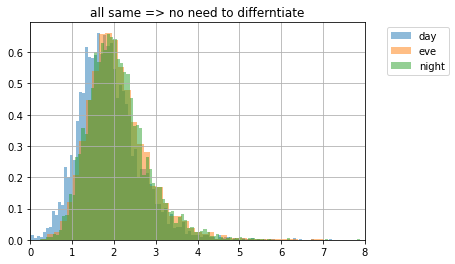

In [15]:
df["total_day_duration"].hist(bins=100, alpha=0.5, density=1, label="day")
df["total_eve_duration"].hist(bins=100, alpha=0.5, density=1, label="eve")
df["total_night_duration"].hist(bins=100, alpha=0.5, density=1, label="night")
plt.xlim((0,8))
#plt.ylim((0.0,0.1))
plt.legend(fontsize=10) # using a size in points
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("all same => no need to differntiate");

In [16]:
df.drop(["total_day_duration", "total_eve_duration", "total_night_duration"], axis=1, inplace=True)

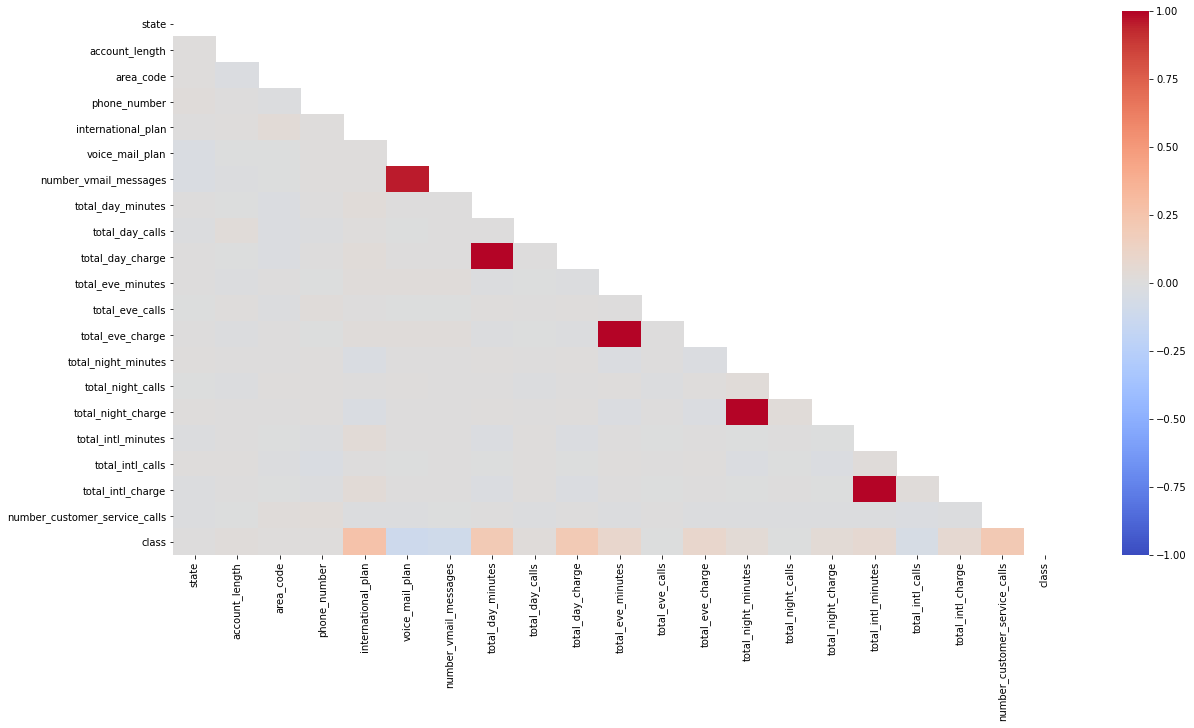

In [17]:
corr = df.corr()
fig, ax1 = plt.subplots(1, 1, figsize=(20, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, ax=ax1, mask=mask, cmap='coolwarm', vmin=-1, vmax=1);

In [18]:
df.drop(["total_day_charge", "total_eve_charge", "total_night_charge", "total_intl_charge"], axis=1, inplace=True)

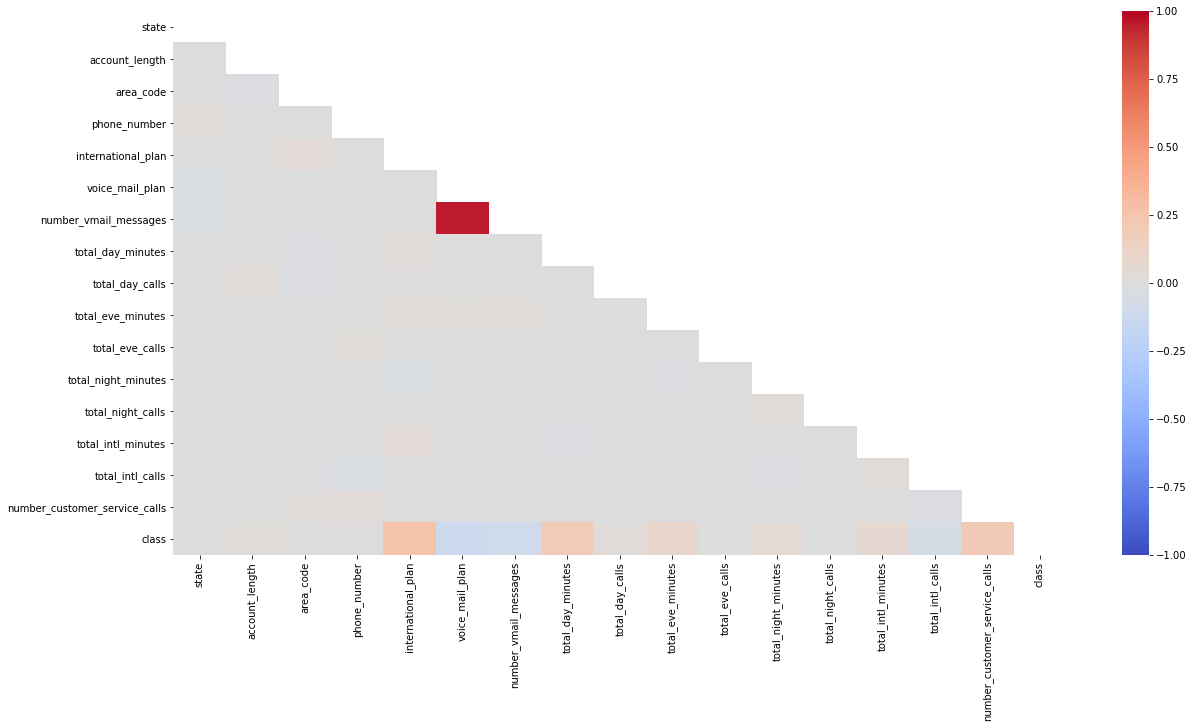

In [19]:
corr = df.corr()
fig, ax1 = plt.subplots(1, 1, figsize=(20, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, ax=ax1, mask=mask, cmap='coolwarm', vmin=-1, vmax=1);

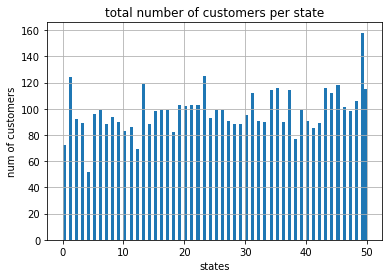

In [44]:
df['state'].hist(bins=100)
plt.title("total number of customers per state")
plt.xlabel("states")
plt.ylabel("num of customers")
plt.show()

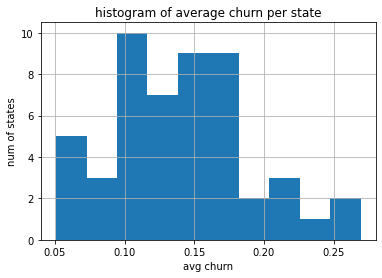

In [45]:
state_df_ = df.groupby('state')["class"].mean()
state_df_.hist()
plt.title("histogram of average churn per state")
plt.xlabel("avg churn")
plt.ylabel("num of states")
plt.show()

In [22]:
sel0 = df["class"]==0
df_0 = df[sel0]
sel1 = df["class"]==1
df_1 = df[sel1] #churn = 1

In [23]:
df_0.state.count()/df.state.count()*100

85.86

In [24]:
df_1.state.count()/df.state.count()*100

14.14

# interim result: 

~14% churn  
~86% no churn

# artificial data set with 1/7 churn ratio

In [25]:
df_0.describe() # no churn

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,class
count,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.0
mean,25.956674,99.917074,436.736781,2492.253902,0.063825,0.284416,8.291870,175.746564,99.899604,198.805031,100.241556,199.455113,99.975775,10.190869,4.481947,1.457722,0.0
std,14.897193,39.737531,42.105520,1446.542156,0.244469,0.451189,13.809408,49.634575,19.674019,50.151854,19.862391,50.609570,19.958820,2.749994,2.438233,1.164236,0.0
min,0.000000,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,13.000000,73.000000,408.000000,1240.000000,0.000000,0.000000,0.000000,142.900000,87.000000,164.500000,87.000000,165.900000,87.000000,8.500000,3.000000,1.000000,0.0
50%,26.000000,99.000000,415.000000,2485.000000,0.000000,0.000000,0.000000,178.000000,100.000000,199.500000,101.000000,199.000000,100.000000,10.300000,4.000000,1.000000,0.0
75%,39.000000,127.000000,415.000000,3746.000000,0.000000,1.000000,20.000000,210.700000,113.000000,232.300000,114.000000,233.400000,113.000000,12.000000,6.000000,2.000000,0.0
max,50.000000,243.000000,510.000000,4999.000000,1.000000,1.000000,52.000000,315.600000,163.000000,361.800000,170.000000,395.000000,175.000000,19.700000,19.000000,8.000000,0.0


In [26]:
df_1.describe() # churn

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,class
count,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.0
mean,26.251768,102.332390,437.971711,2543.499293,0.281471,0.144272,4.496464,207.870580,100.817539,211.757850,99.884017,206.078218,99.575672,10.692362,4.151344,2.254597,1.0
std,14.228766,39.396993,42.848131,1425.252780,0.450035,0.351614,11.297719,68.576475,20.757110,51.568859,19.618258,49.685763,19.968555,2.793187,2.550011,1.815956,0.0
min,0.000000,1.000000,408.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.900000,48.000000,47.400000,42.000000,0.000000,0.000000,0.000000,1.0
25%,15.000000,76.000000,411.500000,1310.500000,0.000000,0.000000,0.000000,153.500000,88.000000,175.850000,86.500000,171.750000,85.000000,8.800000,2.000000,1.000000,1.0
50%,26.000000,102.000000,415.000000,2576.000000,0.000000,0.000000,0.000000,215.900000,101.000000,211.100000,99.000000,206.300000,100.000000,10.600000,4.000000,2.000000,1.0
75%,38.000000,126.500000,510.000000,3770.000000,1.000000,0.000000,0.000000,266.450000,115.000000,249.300000,113.500000,240.850000,114.000000,12.800000,5.000000,4.000000,1.0
max,50.000000,225.000000,510.000000,4985.000000,1.000000,1.000000,48.000000,351.500000,165.000000,363.700000,168.000000,381.600000,158.000000,20.000000,20.000000,9.000000,1.0


In [27]:
df_0.number_customer_service_calls.mean()

1.4577218728162125

In [28]:
df_1.number_customer_service_calls.mean()

2.2545968882602545

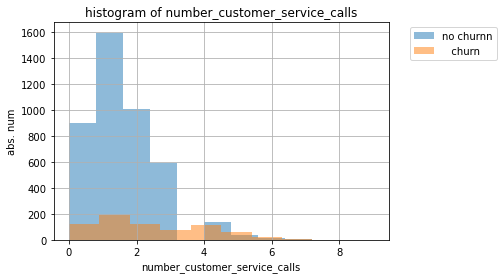

In [29]:
density=0
df_0.number_customer_service_calls.hist(density=density, alpha=0.5, label="no churnn")
df_1.number_customer_service_calls.hist(density=density, alpha=0.5, label="   churn")
plt.title("histogram of number_customer_service_calls")
plt.xlabel("number_customer_service_calls")
plt.ylabel("abs. num")
plt.legend(fontsize=10) # using a size in points
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

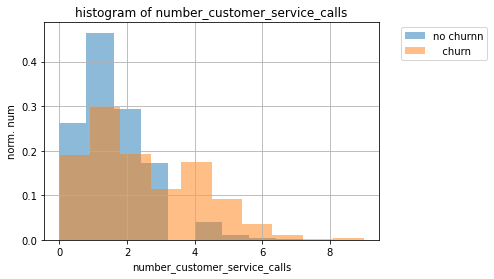

In [30]:
density=1
df_0.number_customer_service_calls.hist(density=density, alpha=0.5, label="no churnn")
df_1.number_customer_service_calls.hist(density=density, alpha=0.5, label="   churn")
plt.title("histogram of number_customer_service_calls")
plt.xlabel("number_customer_service_calls")
plt.ylabel("norm. num")
plt.legend(fontsize=10) # using a size in points
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [31]:
results=pd.DataFrame()

In [32]:
results['no_churn'] = df_0.mean()

In [33]:
results['churn'] = df_1.mean()

In [34]:
results['means_ratio']= results['no_churn'] / results['churn']

In [35]:
results.means_ratio.sort_values(ascending=False)

voice_mail_plan                  1.971397
number_vmail_messages            1.844087
total_intl_calls                 1.079638
total_night_calls                1.004018
total_eve_calls                  1.003580
area_code                        0.997180
total_day_calls                  0.990895
state                            0.988759
phone_number                     0.979852
account_length                   0.976397
total_night_minutes              0.967861
total_intl_minutes               0.953098
total_eve_minutes                0.938832
total_day_minutes                0.845461
number_customer_service_calls    0.646555
international_plan               0.226755
class                            0.000000
Name: means_ratio, dtype: float64

In [36]:
results.means_ratio.sort_values(ascending=False).index

Index(['voice_mail_plan', 'number_vmail_messages', 'total_intl_calls',
       'total_night_calls', 'total_eve_calls', 'area_code', 'total_day_calls',
       'state', 'phone_number', 'account_length', 'total_night_minutes',
       'total_intl_minutes', 'total_eve_minutes', 'total_day_minutes',
       'number_customer_service_calls', 'international_plan', 'class'],
      dtype='object')

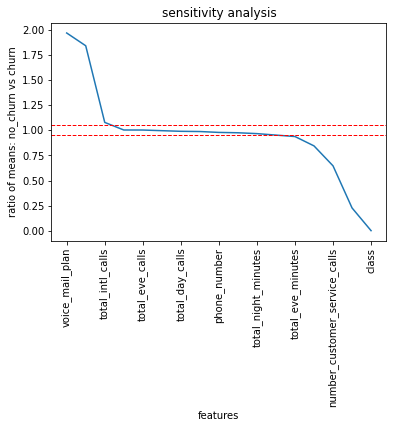

In [46]:
results.means_ratio.sort_values(ascending=False).plot()
plt.axhline(0.95, color='red', linestyle='--', linewidth=1)
plt.axhline(1.05, color='red', linestyle='--', linewidth=1)
plt.title("sensitivity analysis")
plt.xlabel("features")
plt.xticks(rotation=90)
plt.ylabel("ratio of means: no_churn vs churn")
plt.show()

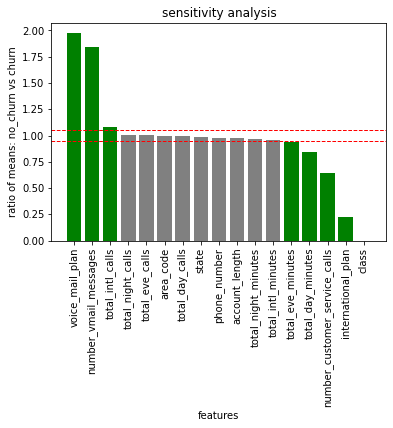

In [38]:
#results.means_ratio.sort_values(ascending=False).plot()
plt.bar(results.means_ratio.sort_values(ascending=False).index,\
        results.means_ratio.sort_values(ascending=False),  \
        color=np.where( (results.means_ratio.sort_values(ascending=False)>1.05) | (results.means_ratio.sort_values(ascending=False)<0.95) ,'green', "gray") )

plt.axhline(0.95, color='red', linestyle='--', linewidth=1)
plt.axhline(1.05, color='red', linestyle='--', linewidth=1)
plt.title("sensitivity analysis")
plt.xlabel("features")
plt.xticks(rotation=90)
plt.ylabel("ratio of means: no_churn vs churn")
plt.show()

In [39]:
#results.means_ratio.sort_values(ascending=False)>=1.05

In [40]:
#results.means_ratio.sort_values(ascending=False)<=0.95

# interim result: sensitivity 95%...105% of mean values ratio: no_churn vs churn

* no_churn > churn:
    * voice_mail_plan                   
    * number_vmail_messages    
but also correlated


slight influence: total_intl_calls

* no_churn < churn: 
    * total_eve_minutes
    * total_day_minutes                 
    * number_customer_service_calls    
    * international_plan      
    

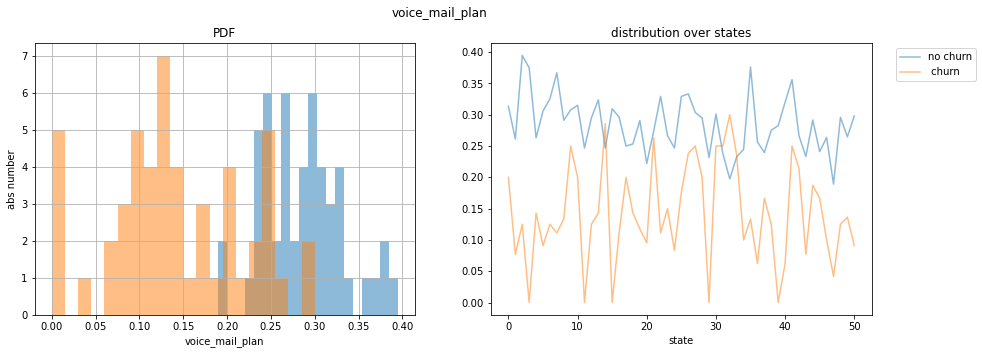

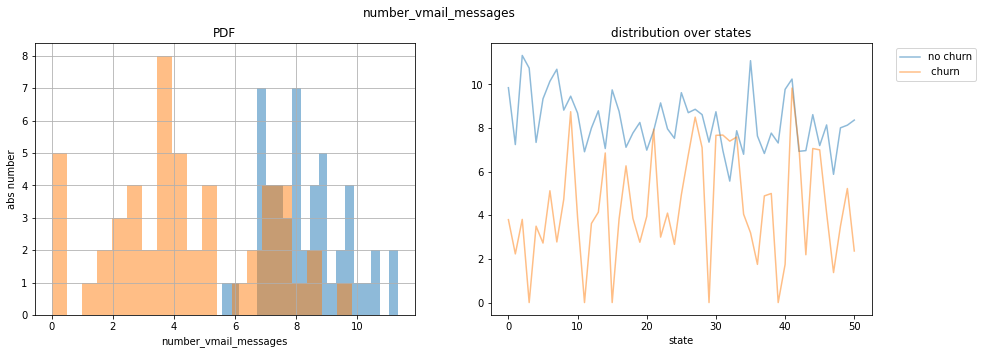

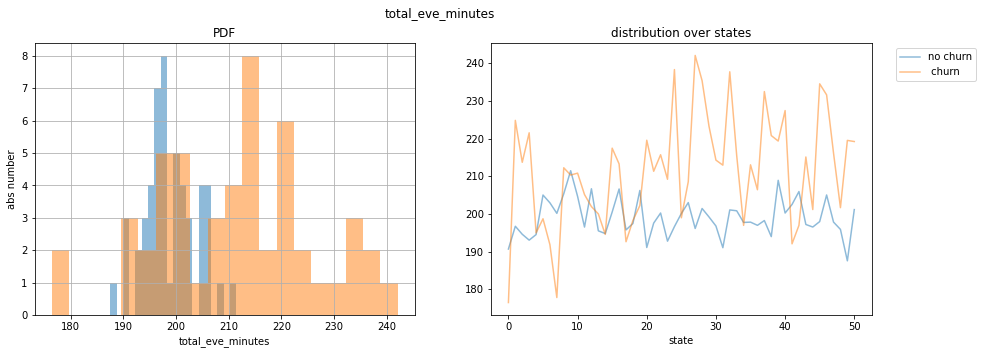

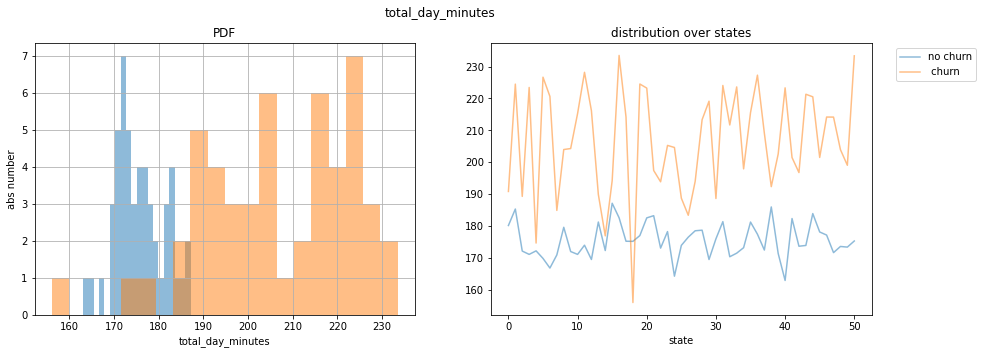

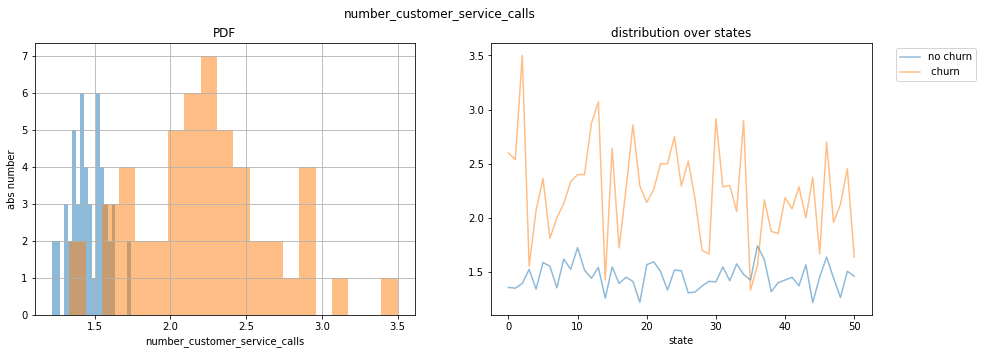

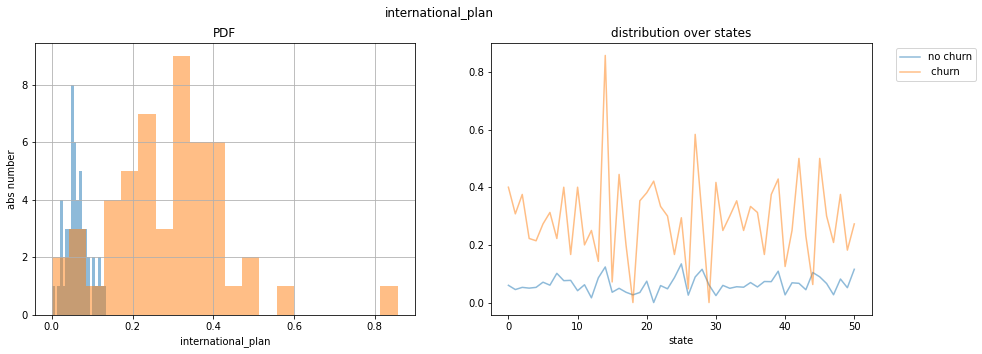

In [41]:
# significant mean change features

features = ['voice_mail_plan', 'number_vmail_messages', 'total_eve_minutes', 'total_day_minutes', 'number_customer_service_calls', 'international_plan' ]

for feature in features:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    state_df0_ = df_0.groupby('state')[feature].mean()   #.reset_index()
    state_df1_ = df_1.groupby('state')[feature].mean()   #.reset_index()
    density=0
    state_df0_.hist(bins=20,density=density, alpha=0.5, label="no churn", ax=ax1)
    state_df1_.hist(bins=20,density=density, alpha=0.5, label="   churn", ax=ax1)
    ax1.set_title('PDF')
    ax1.set_xlabel(f"{feature}")
    ax1.set_ylabel("abs number")
    
    state_df0_.plot(alpha=0.5, label="no churn", ax=ax2)
    state_df1_.plot(alpha=0.5, label=" churn", ax=ax2)
    ax2.set_title("distribution over states")
    
    plt.suptitle(f"{feature}")
    plt.legend(fontsize=10) # using a size in points
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

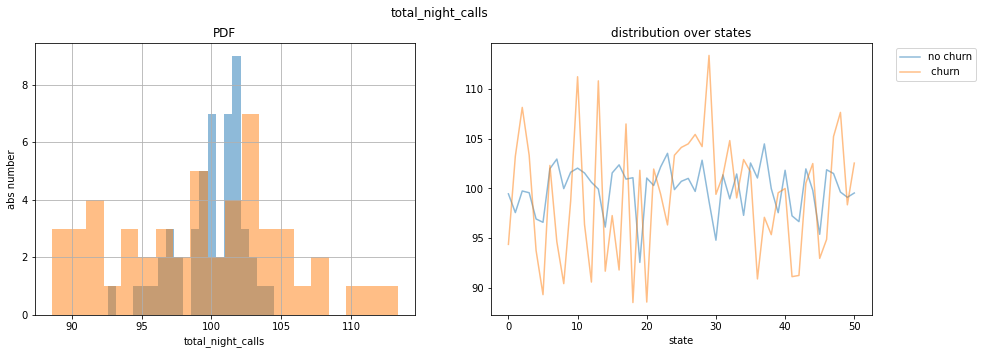

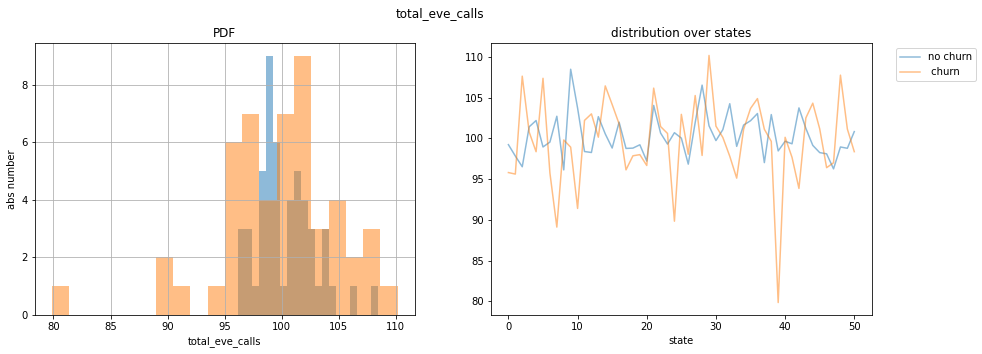

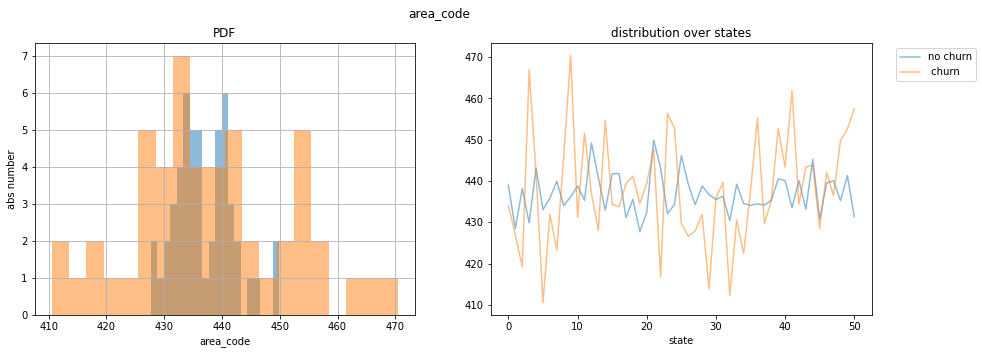

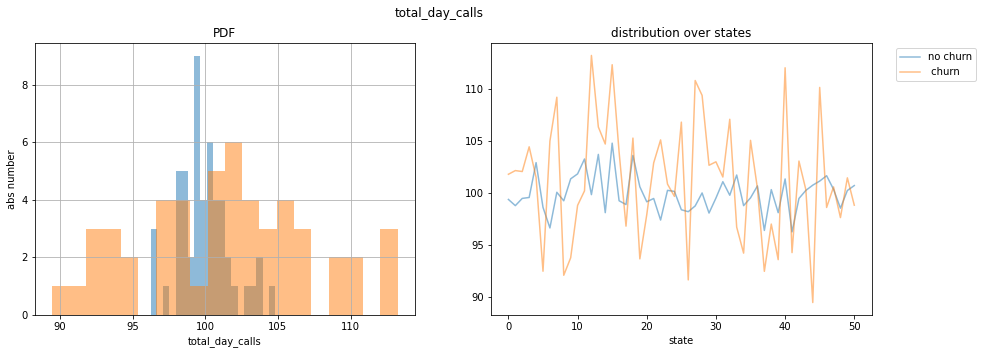

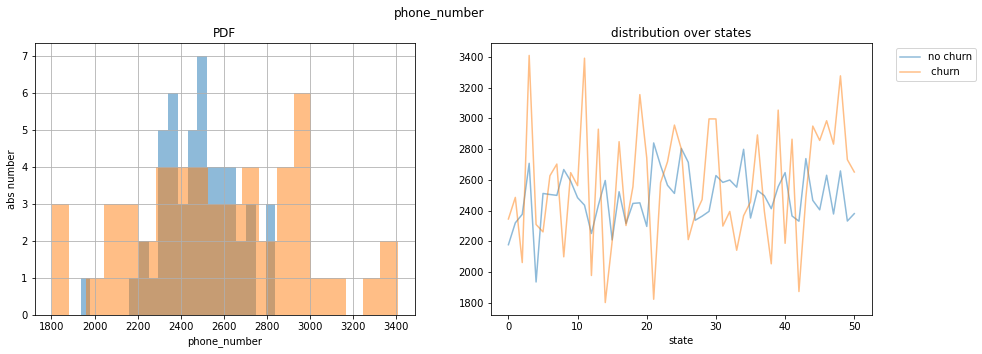

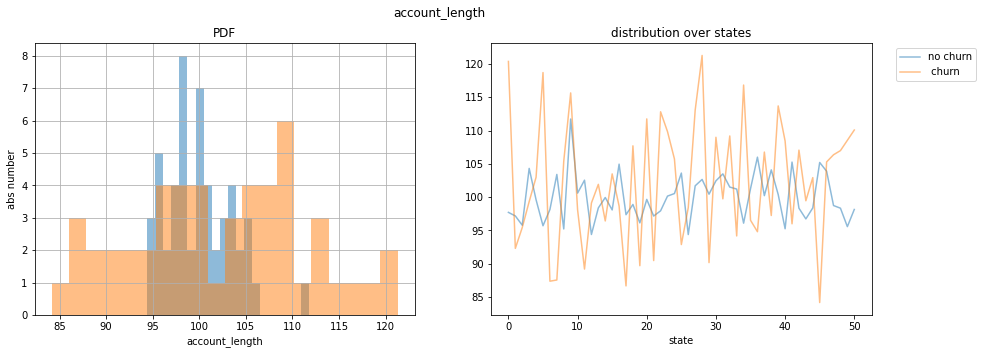

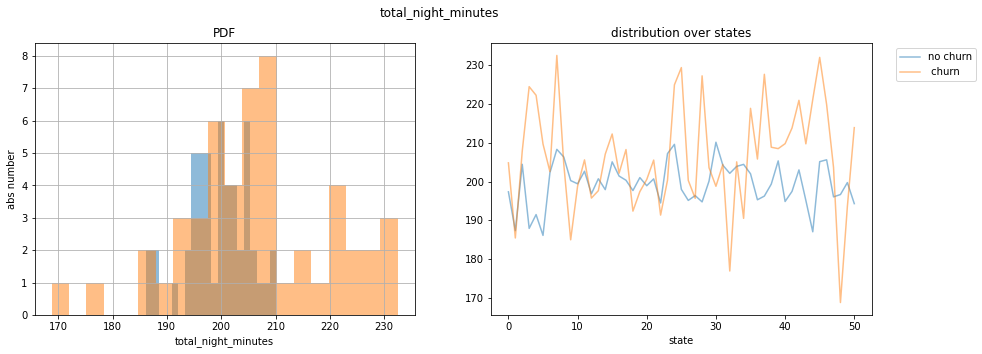

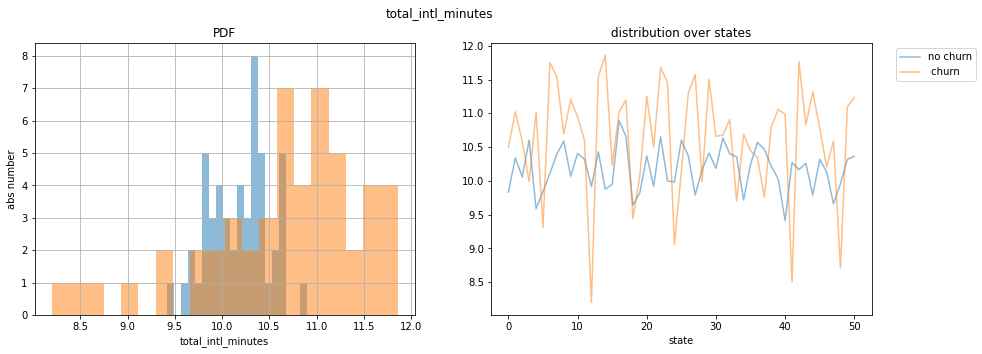

In [47]:
# same average features

features = ['total_night_calls', 'total_eve_calls', 'area_code', 'total_day_calls', 'phone_number', 'account_length', 'total_night_minutes', 'total_intl_minutes' ]

for feature in features:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    state_df0_ = df_0.groupby('state')[feature].mean()   #.reset_index()
    state_df1_ = df_1.groupby('state')[feature].mean()   #.reset_index()
    density=0
    state_df0_.hist(bins=20,density=density, alpha=0.5, label="no churn", ax=ax1)
    state_df1_.hist(bins=20,density=density, alpha=0.5, label="   churn", ax=ax1)
    ax1.set_title('PDF')
    ax1.set_xlabel(f"{feature}")
    ax1.set_ylabel("abs number")
    
    state_df0_.plot(alpha=0.5, label="no churn", ax=ax2)
    state_df1_.plot(alpha=0.5, label=" churn", ax=ax2)
    ax2.set_title("distribution over states")
    
    plt.suptitle(f"{feature}")
    plt.legend(fontsize=10) # using a size in points
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

In [48]:
"""
features = ['voice_mail_plan', 'number_vmail_messages', 'international_plan' ]

for feature in features:
    density=1
    df_0[feature].hist(bins=10,density=density, alpha=0.5, label="no churn")
    df_1[feature].hist(bins=10,density=density, alpha=0.5, label="   churn")
    plt.title(f"{feature} distribution")
    plt.legend(fontsize=10) # using a size in points
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
"""

'\nfeatures = [\'voice_mail_plan\', \'number_vmail_messages\', \'international_plan\' ]\n\nfor feature in features:\n    density=1\n    df_0[feature].hist(bins=10,density=density, alpha=0.5, label="no churn")\n    df_1[feature].hist(bins=10,density=density, alpha=0.5, label="   churn")\n    plt.title(f"{feature} distribution")\n    plt.legend(fontsize=10) # using a size in points\n    plt.legend(bbox_to_anchor=(1.05, 1), loc=\'upper left\')\n    plt.show()\n'

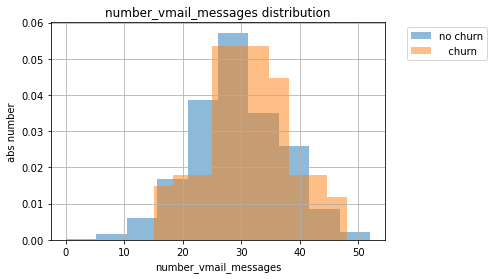

In [49]:
density=1
feature='number_vmail_messages'
df_01 = df_0[ df_0['voice_mail_plan']==1 ]
df_11 = df_1[ df_1['voice_mail_plan']==1 ]
df_01[feature].hist(bins=10,density=density, alpha=0.5, label="no churn")
df_11[feature].hist(bins=10,density=density, alpha=0.5, label="   churn")
plt.title('PDF')
plt.xlabel(f"{feature}")
plt.ylabel("abs number")
plt.title(f"{feature} distribution")
plt.legend(fontsize=10) # using a size in points
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [50]:
"""
density=0
feature='number_vmail_messages'
df_00 = df_0[ df_0['voice_mail_plan']==0 ]
df_10 = df_1[ df_1['voice_mail_plan']==0 ]
df_00[feature].hist(bins=10,density=density, alpha=0.5, label="no churn")
df_10[feature].hist(bins=10,density=density, alpha=0.5, label="   churn")
plt.title(f"{feature} distribution")
plt.legend(fontsize=10) # using a size in points
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
"""

'\ndensity=0\nfeature=\'number_vmail_messages\'\ndf_00 = df_0[ df_0[\'voice_mail_plan\']==0 ]\ndf_10 = df_1[ df_1[\'voice_mail_plan\']==0 ]\ndf_00[feature].hist(bins=10,density=density, alpha=0.5, label="no churn")\ndf_10[feature].hist(bins=10,density=density, alpha=0.5, label="   churn")\nplt.title(f"{feature} distribution")\nplt.legend(fontsize=10) # using a size in points\nplt.legend(bbox_to_anchor=(1.05, 1), loc=\'upper left\')\nplt.show()\n'

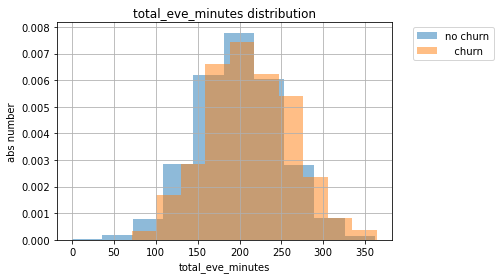

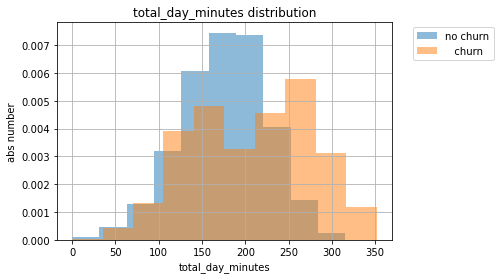

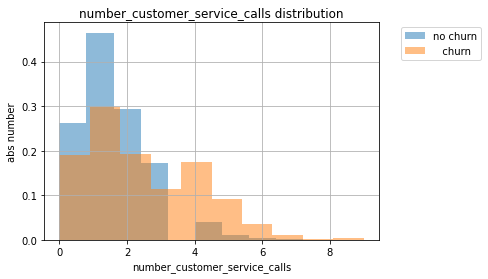

In [51]:
main_features = ['total_eve_minutes', 'total_day_minutes', 'number_customer_service_calls' ]

for feature in main_features:
    density=1
    df_0[feature].hist(bins=10,density=density, alpha=0.5, label="no churn")
    df_1[feature].hist(bins=10,density=density, alpha=0.5, label="   churn")
    plt.title('PDF')
    plt.xlabel(f"{feature}")
    plt.ylabel("abs number")
    plt.title(f"{feature} distribution")
    plt.legend(fontsize=10) # using a size in points
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# most relevant features:

* 'total_eve_minutes', 'total_day_minutes', 'number_customer_service_calls' 

In [52]:
def my_fit_cm_roc(df, pipe, feature_list, target, plot=1, scale=True):
    '''includes 
     - train test split, 
     - model fit,
     - plots confusion matrix and
     - ROC curves
     
     RETURN: true positive of test set with 20% ratio
     ''' 
# old: RETURN: auc of test set with 20% ratio  

    X_train, X_test,\
    y_train, y_test =\
    train_test_split(df[feature_list],
                     df[target],
                     test_size=0.2,
                     random_state=1234,
                     stratify=df[target])

    #display( cross_val_score(pipe, X_train, y_train).mean() )
    
    scaler  = StandardScaler(with_mean=scale, with_std=scale).fit(X_train)
    X_train = scaler.transform(X_train)
    X_test  = scaler.transform(X_test)

    pipe.fit(X_train, y_train)
    
    test_auc_score = roc_auc_score(y_test, pipe.predict(X_test))
    fpr__, tpr__, thresholds_ = roc_curve(y_test, pipe.predict(X_test) )
    
    if plot==1:
        plot_confusion_matrix(pipe, X_train, y_train, values_format="0.3f", normalize='true', cmap=plt.cm.Blues)#, cmap="RdYlGn")
        plt.title(f"best accuracy: { accuracy_score(y_train, pipe.predict(X_train)):0.3f}, train")

        plot_confusion_matrix(pipe, X_test, y_test, values_format="0.3f", normalize='true', cmap=plt.cm.Blues)#, cmap="RdYlGn")
        plt.title(f"best accuracy: { accuracy_score(y_test, pipe.predict(X_test)):0.3f}, test")
        plt.show()

        # ROC curve with AUC ##
        plt.plot([0, 1], [0, 1], 'k--')
        fpr, tpr, thresholds = roc_curve(y_train, pipe.predict_proba(X_train)[:, 1] )
        plt.plot(fpr, tpr, label='train', c="black")

        fpr_, tpr_, thresholds_ = roc_curve(y_test, pipe.predict_proba(X_test)[:, 1] )
        plt.plot(fpr_, tpr_, label='test', c="red")

        # show real values in plot as text
        offset_x,offset_y = -0.25 , 0.025
        #fpr__, tpr__, thresholds_ = roc_curve(y_test, pipe.predict(X_test) )
        if (fpr__[1] < -offset_x) :   offset_x, offset_y = offset_y, -offset_y
        plt.text(fpr__[1]+offset_x, tpr__[1]+offset_y, f"({fpr__[1]:0.3f}, {tpr__[1]:0.3f})", c="r")
        plt.scatter(fpr__[1], tpr__[1], c="red")


        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
        plt.title(f"ROC curve with test-AUC:{test_auc_score:0.3f}")
        plt.legend(loc='best')
        plt.show()
    
    #return test_auc_score
    return tpr__[1]
    

In [53]:
########################################################
########################################################

In [54]:
target = 'class'
main_features = ['total_eve_minutes', 'total_day_minutes', 'number_customer_service_calls' ]
drop_list = ['state', 'account_length', 'area_code', 'phone_number', 'class'] # here we exclude "state", we need to differentiate later
all_features = df.columns.drop(drop_list)

In [68]:
score_main=[]
score_all =[]
plot=0
scale=False
random_state = 1234
modelnames =[
    'logreg',
    'kNN'
    'decision tree',
    'random forrest',
    #'MNBayes',
    'GradientBoost',
    'XGB'
]
models = [ 
        LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                           verbose=0, warm_start=False),
        KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                           weights='uniform'),
        DecisionTreeClassifier(max_depth = 22, random_state = random_state,  splitter = "best", criterion = "gini"),
        RandomForestClassifier(n_estimators = 100, random_state = random_state,  max_depth = 22, criterion = "gini"),
        #MultinomialNB(),
        GradientBoostingClassifier(random_state=random_state),
        XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, subsample=1)
          
]

for m in models:
    score_main.append( my_fit_cm_roc(df, m, main_features, target, plot=plot, scale=scale ) )
    score_all.append(  my_fit_cm_roc(df, m, all_features,  target, plot=plot, scale=scale ) )


In [85]:
if 0: # not neede anymore
    display(score_main)   
    display(score_all) 
    plt.plot([0., 1], [0., 1], 'k--')
    plt.scatter(score_main, score_all)
    plt.xlabel("main features")
    plt.ylabel("all features")
    plt.show()

In [100]:
print(f"best model: {modelnames[ np.argmax(score_all)-1 ]}")
print(f"best model: {models[     np.argmax(score_all)   ]}")
m=models[ np.argmax(score_all) ]
print(f"best true positive: {my_fit_cm_roc(df, m, all_features,  target, plot=0, scale=scale)*100:2.2f}")

best model: XGB
best model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.9, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=0, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)
best true positive: 77.30


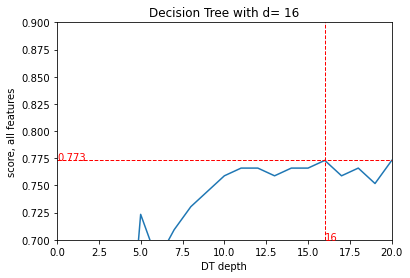

In [93]:
if 0: # for DT model
    score_depth=[]
    for depth in range(1,21):
        m=DecisionTreeClassifier(max_depth = depth, random_state = random_state,  splitter = "best", criterion = "gini")
        score_depth.append( my_fit_cm_roc(df, m, all_features,  target, plot=0, scale=scale) )


    #display(score_depth)
    #print( np.argmax(score_depth)+1, np.max(score_depth) )
    xmin=0
    ymin=0.7
    plt.plot(range(1,21),score_depth) 
    plt.xlim((xmin,20))
    plt.ylim((ymin,0.9))
    plt.axhline(np.max(score_depth), color='red', linestyle='--', linewidth=1)
    plt.axvline(np.argmax(score_depth)+1, color='red', linestyle='--', linewidth=1)
    plt.annotate(f"{np.argmax(score_depth)+1:2d}", xy=(np.argmax(score_depth)+1, ymin), c='r')
    plt.annotate(f"{np.max(score_depth):0.3f}",    xy=(xmin, np.max(score_depth))     , c='r')
    plt.title(f"Decision Tree with d= {np.argmax(score_depth)+1}")
    plt.xlabel("DT depth")
    plt.ylabel("score, all features")
    plt.show()

    m=DecisionTreeClassifier(max_depth = np.argmax(score_depth)+1, random_state = random_state,  splitter = "best", criterion = "gini")
    best_= my_fit_cm_roc(df, m, all_features,  target, plot=0, scale=scale) 

    plt.figure(figsize=(40,20))
    plot_tree(m, feature_names = all_features, max_depth=np.argmax(score_depth)+1, filled=True);
    
    plt.figure(figsize=(40,20))
    plot_tree(m, feature_names = all_features, max_depth=2, filled=True);

# now: with state as feature is worse than without 

clear: state index is interpreted as value!

In [101]:
target = 'class'
main_features = ['total_eve_minutes', 'total_day_minutes', 'number_customer_service_calls' ]
drop_list = ['account_length', 'area_code', 'phone_number', 'class'] # here we exclude "state", we need to differentiate later
all_features = df.columns.drop(drop_list)

In [102]:
score_main=[]
score_all =[]
plot=0
scale=False
random_state = 1234
modelnames =[
    'logreg',
    'kNN'
    'decision tree',
    'random forrest',
    #'MNBayes',
    'GradientBoost',
    'XGB'
]
models = [ 
        LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                           verbose=0, warm_start=False),
        KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                           weights='uniform'),
        DecisionTreeClassifier(max_depth = 22, random_state = random_state,  splitter = "best", criterion = "gini"),
        RandomForestClassifier(n_estimators = 100, random_state = random_state,  max_depth = 22, criterion = "gini"),
        #MultinomialNB(),
        GradientBoostingClassifier(random_state=random_state),
        XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, subsample=1)
          
]

for m in models:
    score_main.append( my_fit_cm_roc(df, m, main_features, target, plot=plot, scale=scale) )
    score_all.append(  my_fit_cm_roc(df, m, all_features,  target, plot=plot, scale=scale) )


In [103]:
if 0: # not neede anymore
    display(score_main)   
    display(score_all) 
    plt.plot([0., 1], [0., 1], 'k--')
    plt.scatter(score_main, score_all)
    plt.xlabel("main features")
    plt.ylabel("all features")
    plt.show()

In [104]:
print(f"best model: {modelnames[ np.argmax(score_all)-1 ]}")
print(f"best model: {models[     np.argmax(score_all)   ]}")
m=models[ np.argmax(score_all) ]
print(f"best true positive: {my_fit_cm_roc(df, m, all_features,  target, plot=0, scale=scale)*100:2.2f}")

best model: XGB
best model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.9, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=0, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)
best true positive: 76.60


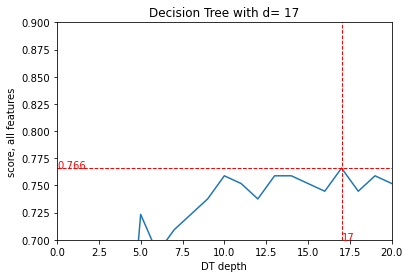

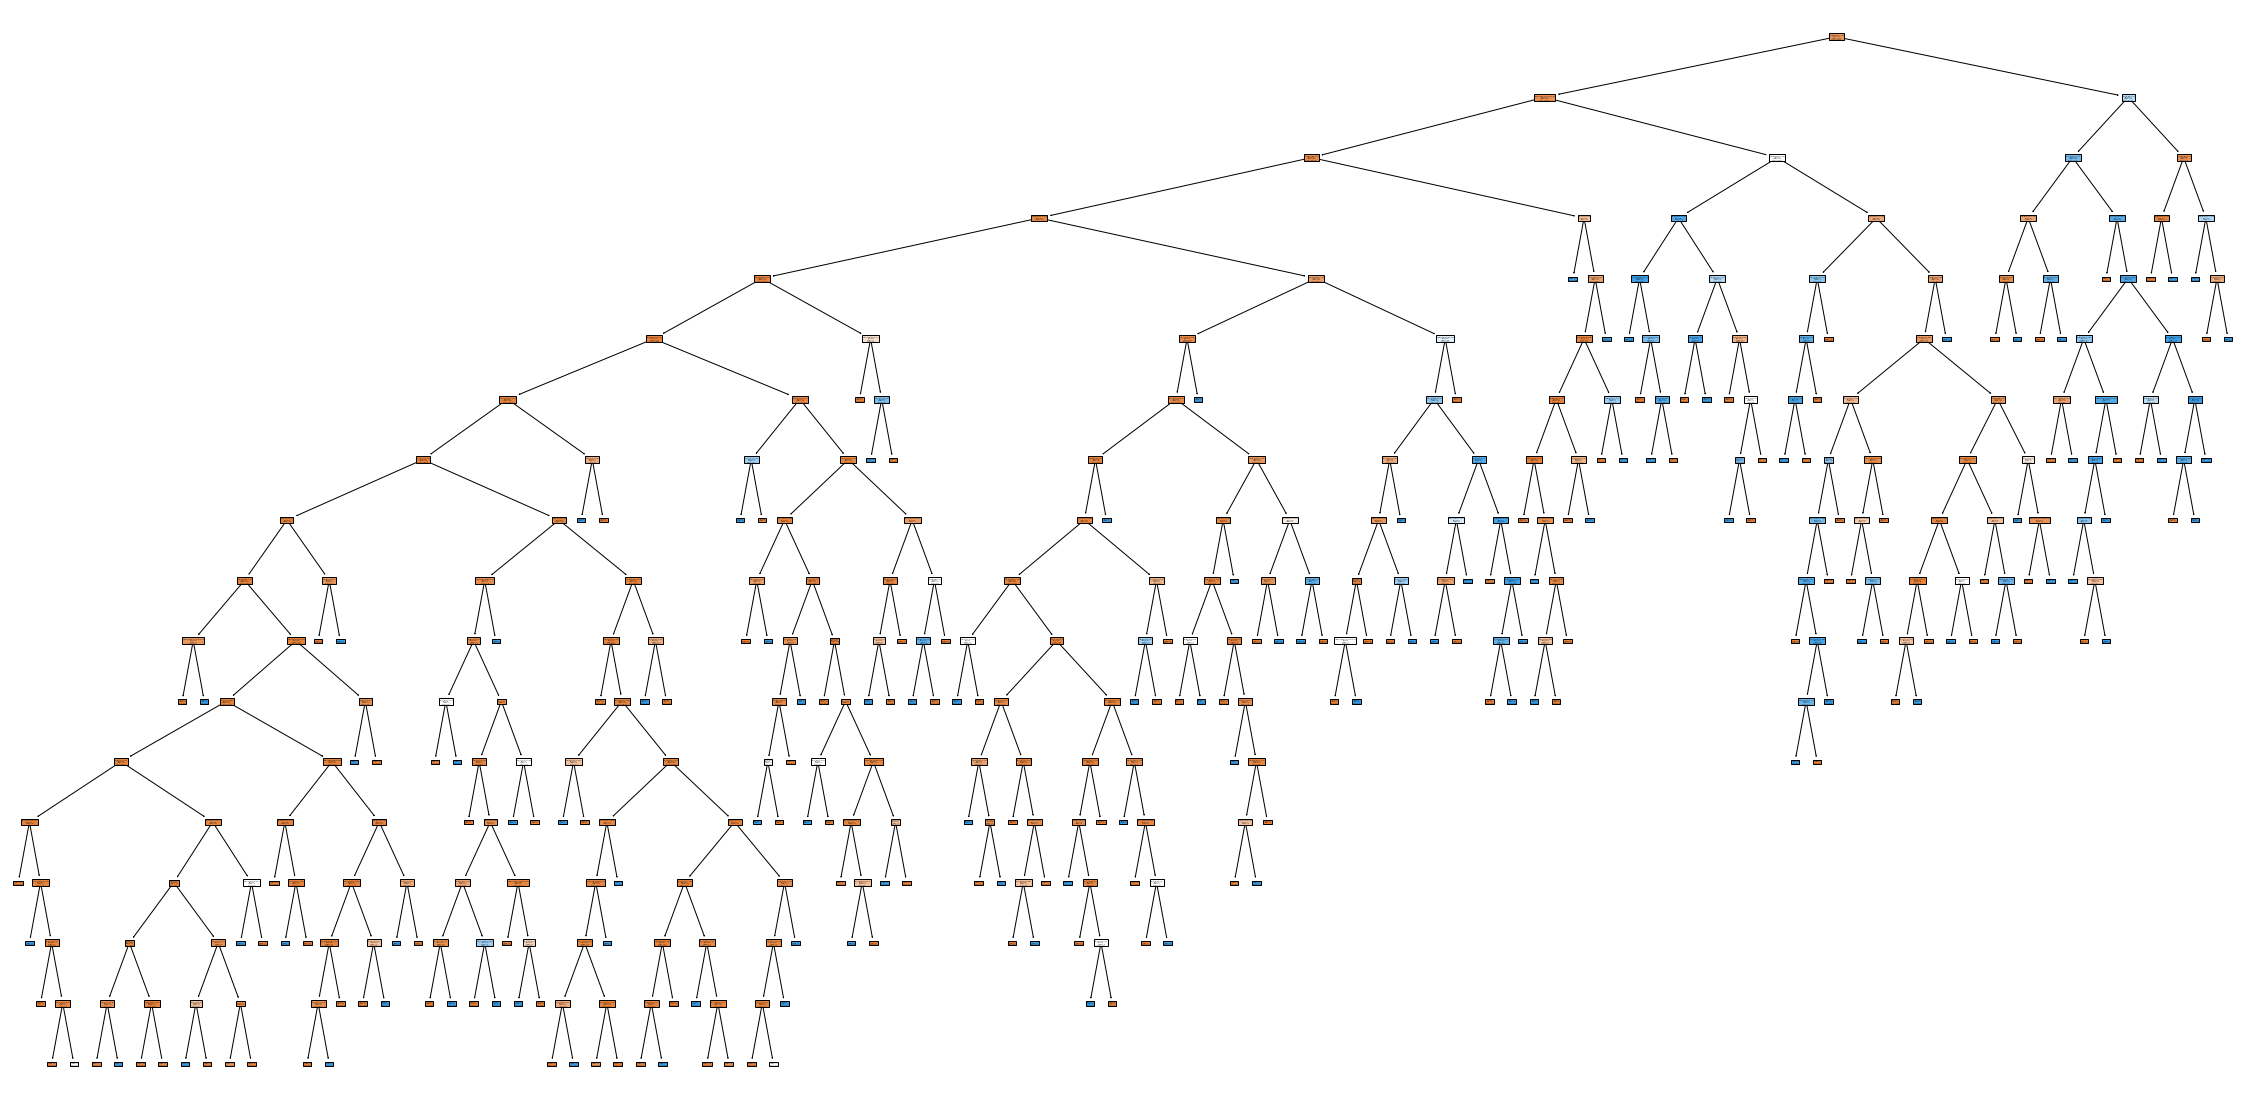

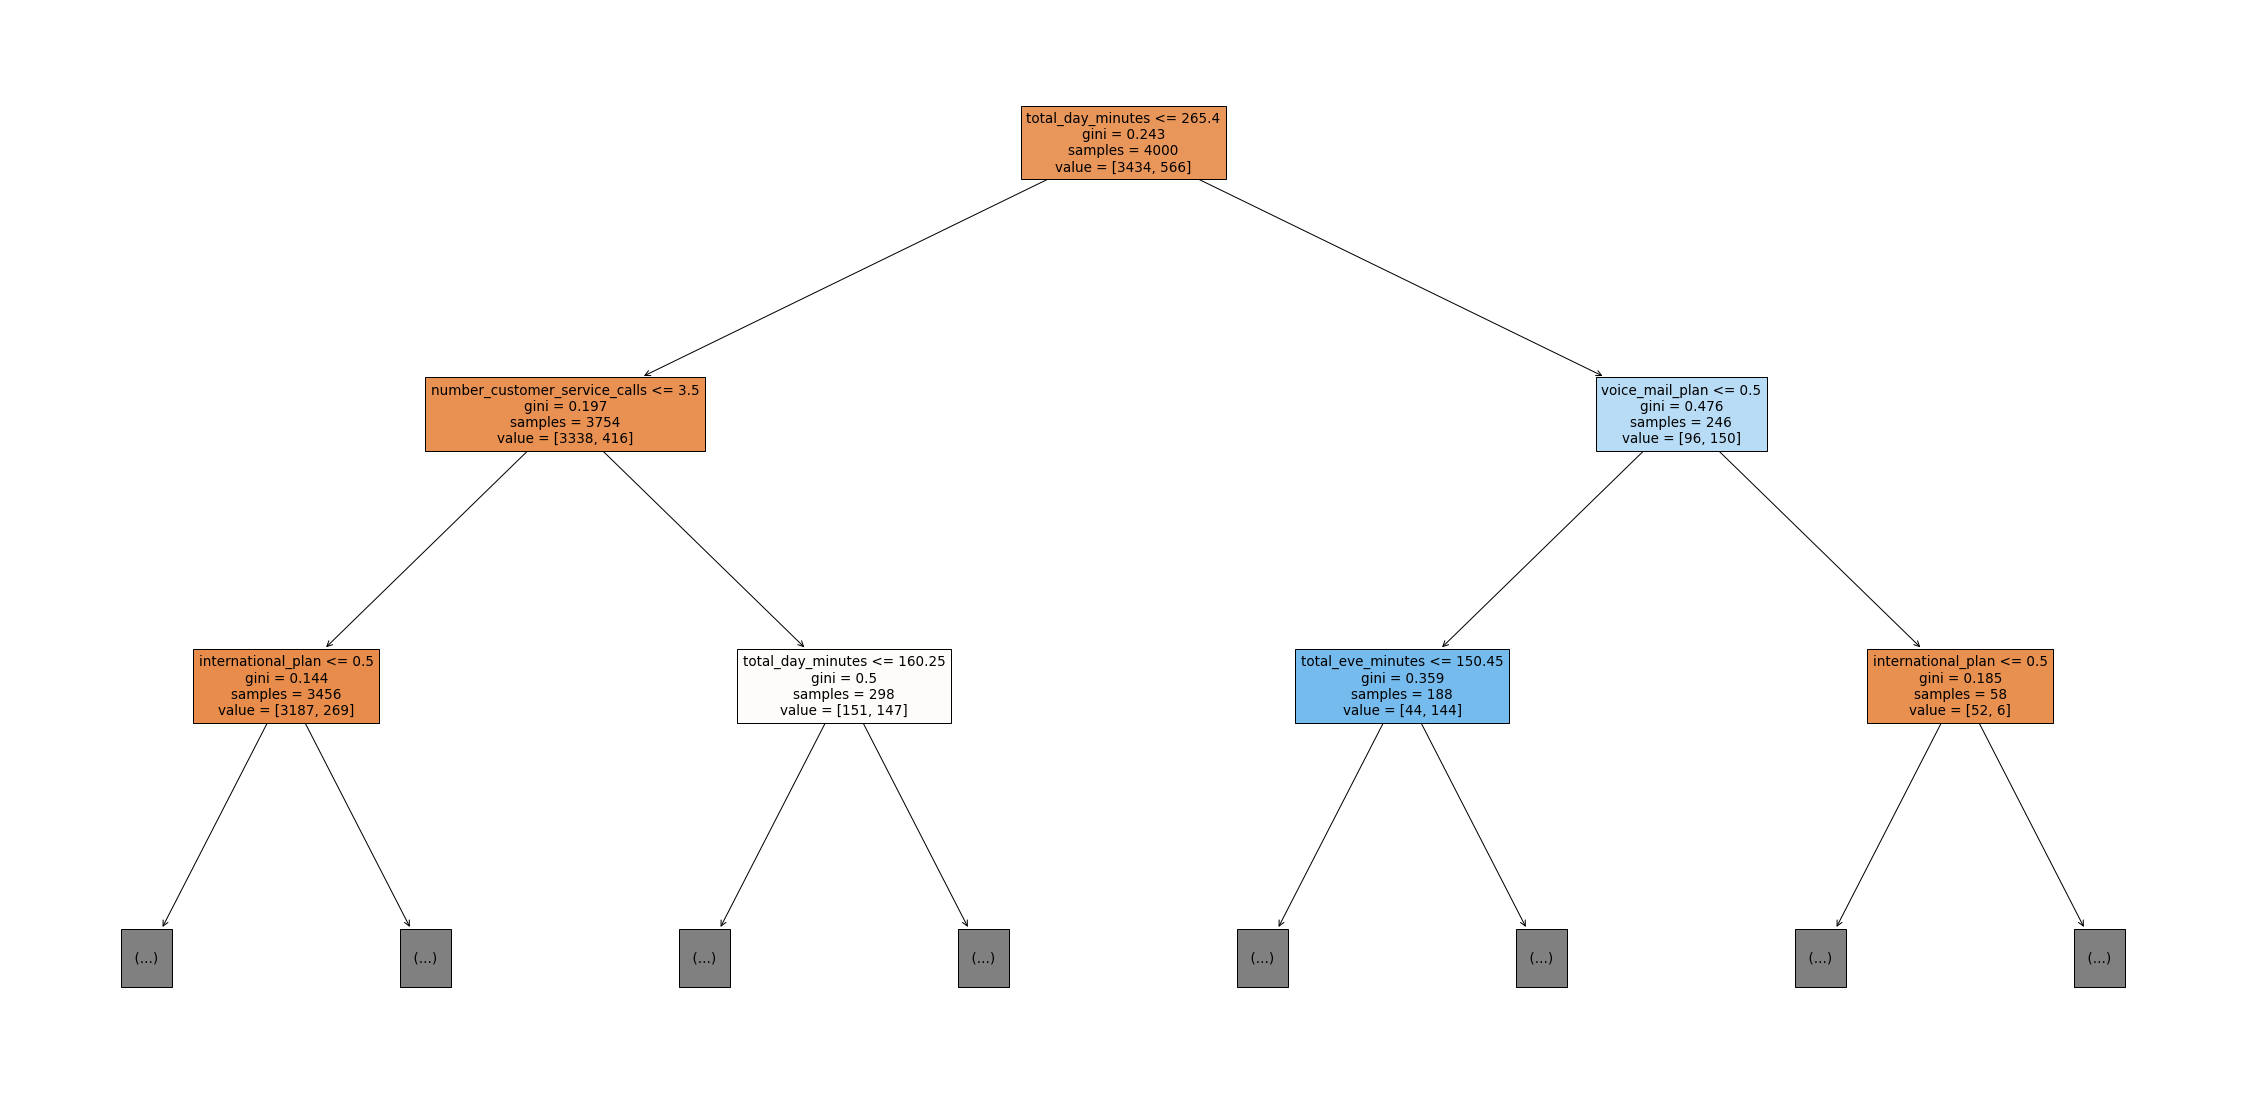

In [105]:
if 0: # for DT model
    score_depth=[]
    for depth in range(1,21):
        m=DecisionTreeClassifier(max_depth = depth, random_state = random_state,  splitter = "best", criterion = "gini")
        score_depth.append( my_fit_cm_roc(df, m, all_features,  target, plot=0, scale=scale) )


    #display(score_depth)
    #print( np.argmax(score_depth)+1, np.max(score_depth) )
    xmin=0
    ymin=0.7
    plt.plot(range(1,21),score_depth) 
    plt.xlim((xmin,20))
    plt.ylim((ymin,0.9))
    plt.axhline(np.max(score_depth), color='red', linestyle='--', linewidth=1)
    plt.axvline(np.argmax(score_depth)+1, color='red', linestyle='--', linewidth=1)
    plt.annotate(f"{np.argmax(score_depth)+1:2d}", xy=(np.argmax(score_depth)+1, ymin), c='r')
    plt.annotate(f"{np.max(score_depth):0.3f}",    xy=(xmin, np.max(score_depth))     , c='r')
    plt.title(f"Decision Tree with d= {np.argmax(score_depth)+1}")
    plt.xlabel("DT depth")
    plt.ylabel("score, all features")
    plt.show()

    m=DecisionTreeClassifier(max_depth = np.argmax(score_depth)+1, random_state = random_state,  splitter = "best", criterion = "gini")
    best_= my_fit_cm_roc(df, m, all_features,  target, plot=0, scale=scale) 

    plt.figure(figsize=(40,20))
    plot_tree(m, feature_names = all_features, max_depth=np.argmax(score_depth)+1, filled=True);
    
    plt.figure(figsize=(40,20))
    plot_tree(m, feature_names = all_features, max_depth=2, filled=True);

In [ ]:
#plt.scatter(df.total_day_minutes, df.total_day_calls, s=1)

In [ ]:
#plt.scatter(df.total_day_minutes, df.total_day_charge, s=1)

In [ ]:
#sns.scatterplot(data=df, x='number_customer_service_calls', y='class')

In [ ]:
#plt.figure(figsize=(10,10))
#sns.histplot(data=df[df['class']==1], x='number_customer_service_calls', color='red')
#sns.histplot(data=df[df['class']==0], x='number_customer_service_calls', color='green')
#plt.show()
